In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from dataset.mnist import load_mnist
(x_train, y_train), (x_test, y_test) = load_mnist(flatten=False, normalize=True, one_hot_label=True)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

from myfunctions import *
from network import *

(60000, 1, 28, 28)
(60000, 10)
(10000, 1, 28, 28)
(10000, 10)


In [4]:
net = Network()

net.add(Convolution([1,28,28],[3,3],16, pad=1))
net.add(Relu())
net.add(Convolution([16,28,28],[3,3],16, pad=1))
net.add(Relu())
net.add(Pooling([2,2], stride=2))

net.add(Convolution([16,14,14],[3,3],32, pad=1))
net.add(Relu())
net.add(Convolution([32,14,14],[3,3],32, pad=2))
net.add(Relu())
net.add(Pooling([2,2], stride=2))

net.add(Convolution([32,8,8],[3,3],64, pad=1))
net.add(Relu())
net.add(Convolution([64,8,8],[3,3],64, pad=1))
net.add(Relu())
net.add(Pooling([2,2], stride=2))

net.add(Flatten())
net.add(Affine([1024,50]))
net.add(Relu())
net.add(Dropout())
net.add(Affine([50,10]))
net.add(Dropout())
net.set_loss(SoftmaxWithLoss())

i=0
out = x_test[:1]
for layer in net.layers:
    out = layer.forward(out)
    print(i , layer.__class__.__name__, out.shape)
    i+=1

0 Convolution (1, 16, 28, 28)
1 Relu (1, 16, 28, 28)
2 Convolution (1, 16, 28, 28)
3 Relu (1, 16, 28, 28)
4 Pooling (1, 16, 14, 14)
5 Convolution (1, 32, 14, 14)
6 Relu (1, 32, 14, 14)
7 Convolution (1, 32, 16, 16)
8 Relu (1, 32, 16, 16)
9 Pooling (1, 32, 8, 8)
10 Convolution (1, 64, 8, 8)
11 Relu (1, 64, 8, 8)
12 Convolution (1, 64, 8, 8)
13 Relu (1, 64, 8, 8)
14 Pooling (1, 64, 4, 4)
15 Flatten (1, 1024)
16 Affine (1, 50)
17 Relu (1, 50)
18 Dropout (1, 50)
19 Affine (1, 10)
20 Dropout (1, 10)


In [3]:
batch_accuracy_track = []
test_accuracy_track = []
loss_track=[]

In [5]:
import time
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01
iter_per_epoch = train_size/batch_size
epochs = 10
iter_step = int(iter_per_epoch)
# iter_step = 10
for epoch in range(epochs):
    start_time = time.time()
    for i in range(iter_step):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch=x_train[batch_mask]
        y_batch=y_train[batch_mask]
        loss = net.fit(x_batch, y_batch, learning_rate=learning_rate)
        loss_track.append(loss)
        if i%(np.max([iter_step/1000,1]))==0:
            print("== Loss {0:0.4f}, Process : {1:0.1f}% ==".format(loss, i/iter_step*100), end="\r")
    batch_accuracy = net.accuracy(x_batch, y_batch)
    mask = np.random.choice(x_test.shape[0], 1000)
    test_accuracy = net.accuracy(x_test[mask], y_test[mask])
    batch_accuracy_track.append(batch_accuracy)
    test_accuracy_track.append(test_accuracy)
    print("== {0} Epoch, Loss {1:0.4f}, Batch Accuracy  {2:0.4f}, Test Accuracy : {3:0.4f} == ({4:0.2f} m)".format(epoch+1, loss, batch_accuracy, test_accuracy, (time.time()-start_time)/60))

== 1 Epoch, Loss 1.0314, Batch Accuracy  0.9900, Test Accuracy : 0.9850 == (12.96 m)
== 2 Epoch, Loss 1.0139, Batch Accuracy  0.9900, Test Accuracy : 0.9880 == (12.69 m)
== 3 Epoch, Loss 0.8741, Batch Accuracy  1.0000, Test Accuracy : 0.9920 == (11.23 m)
== 4 Epoch, Loss 0.9636, Batch Accuracy  1.0000, Test Accuracy : 0.9930 == (7.10 m)
== 5 Epoch, Loss 1.0130, Batch Accuracy  0.9800, Test Accuracy : 0.9890 == (7.47 m)
== 6 Epoch, Loss 0.9374, Batch Accuracy  1.0000, Test Accuracy : 0.9940 == (7.90 m)
== 7 Epoch, Loss 0.8521, Batch Accuracy  1.0000, Test Accuracy : 0.9900 == (7.60 m)
== 8 Epoch, Loss 0.9739, Batch Accuracy  0.9900, Test Accuracy : 0.9880 == (7.69 m)
== 9 Epoch, Loss 0.6379, Batch Accuracy  1.0000, Test Accuracy : 0.9920 == (7.85 m)


In [6]:
mask = np.random.choice(x_test.shape[0], 1000)
test_accuracy = net.accuracy(x_test[mask], y_test[mask])

print("{0:0.4f}".format(test_accuracy))

0.9930


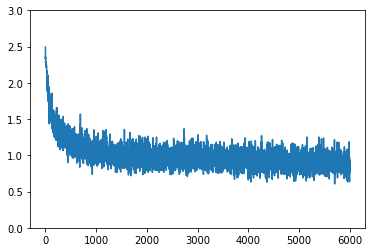

In [7]:
l_track = np.array(loss_track)
x = np.arange(l_track.size)
plt.plot(x, l_track, label="loss")
plt.ylim([0,3])
plt.show()

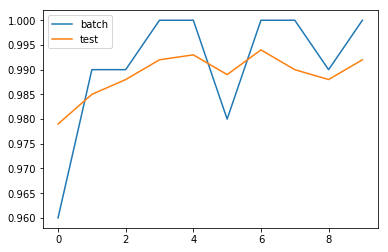

In [8]:
b_track = np.array(batch_accuracy_track)
t_track = np.array(test_accuracy_track)
x = np.arange(b_track.size)
plt.plot(x, b_track, label="batch")
plt.plot(x, t_track, label="test")
# plt.ylim([0,1])
plt.legend(loc=2)
plt.show()

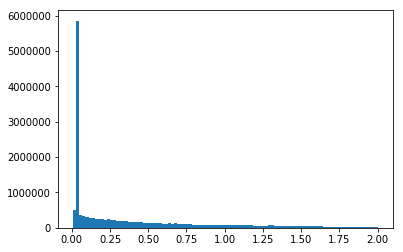

In [9]:
a = net.layers[1].forward(net.layers[0].forward(x_test[0:5000])).reshape(-1)
plt.hist(a, bins=100, range=(0.01,2))
plt.show()

In [43]:
###  SAVE ###
net.accuracy(x_test[0:1], y_test[0:1])
dump = (net.layers, batch_accuracy_track, test_accuracy_track, loss_track)
with open('ch8.wb', 'wb') as f:
    pickle.dump(dump, f)

In [4]:
###  LOAD ###
with open('ch8.wb', 'rb') as f:
    dump = pickle.load(f)
(net.layers, batch_accuracy_track, test_accuracy_track, loss_track) = dump


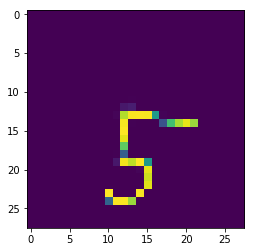

5

In [42]:
## Jpeg to 28,28,1
%matplotlib inline
import os
import cv2
import matplotlib.pyplot as plt
path = "/home/heim/mount_disk/workspace/python/jupyter/Deep learning from scratch/"
im = cv2.imread(path+"5.jpg", cv2.IMREAD_GRAYSCALE)
t = int(im.shape[0]>im.shape[1])
diff = im.shape[1]-im.shape[0]
im = im[-t*int(diff/2):im.shape[0]+t*int(diff/2),(1-t)*int(diff/2):im.shape[1]-(1-t)*int(diff/2)]
im = 1-cv2.resize(im, (28,28), cv2.INTER_AREA)/255
im = np.expand_dims(np.expand_dims(im, axis=0), axis=0)
plt.imshow(im[0][0])
plt.show()
np.argmax(net.predict(im))

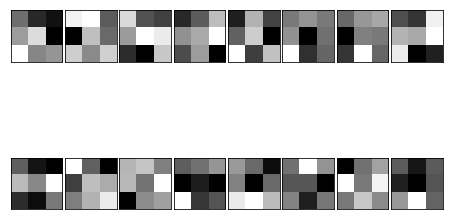